# ENEM_2018
***

The National High School Exam (ENEM - Exame Nacional do Ensino Médio) is a test carried out by the Ministry of Education of Brazil and was created in 1998. It is used to assess the quality of secondary education in the country. Its result serves to access higher education in Brazilian public universities, through the Unified Selection System (SiSU), as well as in some universities abroad.

In this folder we are going analyze part of the candidate's results.
 

There are some important exam characteristics that should be expressed before start the data analysis. 

*   The exam is realized in 2 days;
*   The exam is divided into 4 major knowledge areas and essay;
*   The Newsroom is an eliminatory component if the candidate failure on that 1st day is automatically eliminated. However, the candidate can take the 2nd day exam.

**font:** https://pt.wikipedia.org/wiki/Exame_Nacional_do_Ensino_M%C3%A9dio




Day | Time | Knowledge area | Curricular components | Question number
--- | ---- | -------------- | --------------------- | --------------
1° | 5h 30m |Languages, Codes and their Technologies | Portuguese Language, Literature, Foreign Language (Spanish or English), Arts, Physical Education and Information and Communication Technologies |45
1° | 5h 30m | Human Sciences and their Technologies | History, Geography, Philosophy and Sociology | 45
1° | 5h 30m | Essay | Essay-argumentative writing | 1
2° | 5h | Natural Sciences and its Technologies | Biology, Physics and Chemistry | 45
2° | 5h | Mathematics and its Technologies | Mathematics | 45



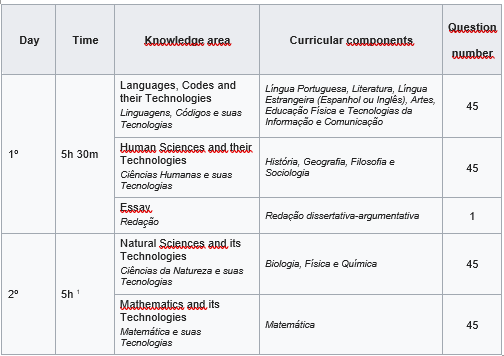









## Problem Statement
***
Given a set of scores and responses from the candidates' tests:
* Analyze the correlation between test scores to predict your score from different tests to see if the candidate needs to do all the tests.

* Understand whether the ordering of questions in the different test models influences the candidate's grade.


To accomplish this task, we will use a portion of the set of real-world data collected from the ENEM 2018 data set official.

## Approach
***
The goal is organize the raw data to implement Logistic Regression on the test scores, to find a correlation between two test.The end result is a distribution (trace) of all the model parameter values that are drawn from the posterior. The procedure will be implemented in the Python library *pandas*, *numpy*, *matplotlib*, *seaborn* and *sklearn*.


The basic outline is as follows:
1.   Exploratory Data Analysis (in previous notebook)
2.   Split data into training and testing sets
3.   Define the correlation among the test scores and set up the Linear regression line for the best correlation 
4.   Compare the answers of the candidate and the oficila answer to creat a method to score the hit of each question on the test
5. Draw conclusions and outline future work opportunities


In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Definition of precision numbers in the raw data table
%precision %.2f
pd.options.display.float_format = '{:,.2f}'.format

df = pd.read_csv("https://github.com/guilhermesilveira/enem-2018/blob/master/MICRODADOS_ENEM_2018_SAMPLE_43278.csv?raw=true")
df.head()


,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,180009327796,2018,2112209,Timon,21,MA,34.00,M,1.00,1,1,"2,207,702.00",Parnaíba,22.00,PI,1,5,1,3.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,1,0,0,0,0,0,0,0,0,...,NaN,1,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,B,B,B,B,4,C,A,B,C,A,B,B,A,B,A,B,A,A,B,A,A,C,A,B,B,A,A
1,180012890374,2018,3557105,Votuporanga,35,SP,14.00,M,0.00,1,1,"3,557,105.00",Votuporanga,35.00,SP,4,0,1,nan,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,ADDEDEEBCAADDEDEBECCBAECECEDBAADEABAECDADECDC,0,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,1.00,160.00,120.00,120.00,160.00,120.00,680.00,F,F,A,D,4,N,A,D,D,C,A,B,A,B,A,B,A,A,C,A,B,E,B,D,B,D,D
2,180008223824,2018,2506301,Guarabira,25,PB,20.00,F,0.00,2,1,"2,506,301.00",Guarabira,25.00,PB,1,3,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,ABCBEECAABDDADCACAAAABDDEDACAEEECCDCEBBABBECB,1,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,1.00,120.00,120.00,120.00,120.00,120.00,600.00,E,E,B,B,5,B,A,B,D,A,A,B,A,A,A,B,A,A,B,A,A,D,A,B,B,A,E
3,180007859645,2018,3534807,Ouro Verde,35,SP,17.00,F,0.00,2,1,"3,514,403.00",Dracena,35.00,SP,2,0,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,DEBEBEABDABECACDDDECBBDDBCBBCABDAACCECBABDCDA,0,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,1.00,100.00,120.00,100.00,80.00,0.00,400.00,B,D,C,C,7,F,A,B,D,B,A,B,B,B,A,A,A,A,B,A,A,E,A,A,A,B,A
4,180013499517,2018,3523107,Itaquaquecetuba,35,SP,19.00,M,0.00,3,1,"3,550,308.00",São Paulo,35.00,SP,1,2,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,0,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,F,F,B,D,5,E,A,B,C,B,A,B,A,B,A,A,A,A,B,A,A,D,B,B,B,A,A


In [203]:
# Evaluation of the column titles present in the raw data

print(df.columns.values)

['NU_INSCRICAO' 'NU_ANO' 'CO_MUNICIPIO_RESIDENCIA'
 'NO_MUNICIPIO_RESIDENCIA' 'CO_UF_RESIDENCIA' 'SG_UF_RESIDENCIA'
 'NU_IDADE' 'TP_SEXO' 'TP_ESTADO_CIVIL' 'TP_COR_RACA' 'TP_NACIONALIDADE'
 'CO_MUNICIPIO_NASCIMENTO' 'NO_MUNICIPIO_NASCIMENTO' 'CO_UF_NASCIMENTO'
 'SG_UF_NASCIMENTO' 'TP_ST_CONCLUSAO' 'TP_ANO_CONCLUIU' 'TP_ESCOLA'
 'TP_ENSINO' 'IN_TREINEIRO' 'CO_ESCOLA' 'CO_MUNICIPIO_ESC'
 'NO_MUNICIPIO_ESC' 'CO_UF_ESC' 'SG_UF_ESC' 'TP_DEPENDENCIA_ADM_ESC'
 'TP_LOCALIZACAO_ESC' 'TP_SIT_FUNC_ESC' 'IN_BAIXA_VISAO' 'IN_CEGUEIRA'
 'IN_SURDEZ' 'IN_DEFICIENCIA_AUDITIVA' 'IN_SURDO_CEGUEIRA'
 'IN_DEFICIENCIA_FISICA' 'IN_DEFICIENCIA_MENTAL' 'IN_DEFICIT_ATENCAO'
 'IN_DISLEXIA' 'IN_DISCALCULIA' 'IN_AUTISMO' 'IN_VISAO_MONOCULAR'
 'IN_OUTRA_DEF' 'IN_GESTANTE' 'IN_LACTANTE' 'IN_IDOSO'
 'IN_ESTUDA_CLASSE_HOSPITALAR' 'IN_SEM_RECURSO' 'IN_BRAILLE'
 'IN_AMPLIADA_24' 'IN_AMPLIADA_18' 'IN_LEDOR' 'IN_ACESSO' 'IN_TRANSCRICAO'
 'IN_LIBRAS' 'IN_LEITURA_LABIAL' 'IN_MESA_CADEIRA_RODAS'
 'IN_MESA_CADEIRA_SEPARADA' '

In [204]:
# Selection of columns with student's score

df1_notes = df[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']]
df1_notes.head()
#df1_notes['NU_NOTA_CN'].value_counts()
#df1_notes['NU_NOTA_CN'].unique()
#df1_notes.describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,nan,nan,nan,nan,nan
1,523.10,671.30,661.60,738.00,680.00
2,409.20,531.70,389.00,438.10,600.00
3,452.30,505.50,448.50,544.90,400.00
4,nan,nan,nan,nan,nan


In [205]:
# In this section, the presence of students will be analyzed, 
#since the presence in the writing test is the first eliminatory character.

# Presence status : 0 is ausent; 1 is present; 2 is eliminated

df_presence = df[['TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT']]
df_presence.head()
df_presence.describe()

,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT
count,"137,838.00","137,838.00","137,838.00","137,838.00"
mean,0.71,0.75,0.75,0.71
std,0.46,0.43,0.43,0.46
min,0.00,0.00,0.00,0.00
25%,0.00,1.00,1.00,0.00
50%,1.00,1.00,1.00,1.00
75%,1.00,1.00,1.00,1.00
max,2.00,2.00,2.00,2.00


In [0]:
df1_answers = df[['TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH','TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT']]
df1_answers_dropNan = df[['TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH','TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT']].dropna()


In [0]:
df1_official_answers = df[['TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC', 'TX_GABARITO_MT']]

#  1. REDACAO data treatament 

In [208]:
# All people who have been eliminated or have not been present for the REDACAO (essay) test have NaN in NOTA
# NOTA is the score for this test

df[['NU_NOTA_CN','TP_PRESENCA_CN']].sort_values('TP_PRESENCA_CN', ascending=False)

,NU_NOTA_CN,TP_PRESENCA_CN
4891,nan,2.00
50226,nan,2.00
88532,nan,2.00
105409,nan,2.00
129803,nan,2.00
...,...,...
29711,nan,nan
40090,nan,nan
59853,nan,nan
79555,nan,nan


**REDACAO (Essay) STATUS**

1 Sem problemas;  1 No problem;

**Eliminatory status:**

2 Anulada;   == 2 Canceled;

3 Cópia Texto Motivador; == 3 Copy Motivating Text;

4 Em Branco;  == 4 Blank;

6 Fuga ao tema;  == 6 Escape the theme;

7 Não atendimento ao tipo textual;  == 7 Non-compliance with the textual type;

8 Texto insuficiente;  == 8 Insufficient text;

9 Parte desconectada; == 9 Disconnected part;

Nan - Probabli the faults


In [209]:
#Exploring what represent on this array information
df['TP_STATUS_REDACAO'].head()
df['TP_STATUS_REDACAO'].unique()
#df['TP_STATUS_REDACAO'].describe()
#df['TP_STATUS_REDACAO'].value_counts()

array([nan,  1.,  6.,  8.,  4.,  3.,  7.,  9.,  2.])

In [210]:
# Presence status : 0 is ausent; 1 is present; 2 is eliminated
# REDACAO (Essay) and LC (language and code) presence are the same, the tests take place on the same day. 
#With that LC presence is applied to REDACAO (Essay).

df[['NU_NOTA_REDACAO' ,'TP_STATUS_REDACAO','TP_PRESENCA_LC' ]].describe()
df[['NU_NOTA_REDACAO' ,'TP_STATUS_REDACAO','TP_PRESENCA_LC' ]].sort_values('NU_NOTA_REDACAO')

,NU_NOTA_REDACAO,TP_STATUS_REDACAO,TP_PRESENCA_LC
96367,0.00,4.00,1.00
43076,0.00,4.00,1.00
43070,0.00,6.00,1.00
132506,0.00,3.00,1.00
81557,0.00,6.00,1.00
...,...,...,...
137833,nan,nan,0.00
137837,nan,nan,0.00
137839,nan,nan,0.00
137841,nan,nan,0.00


In [211]:
df_redacao_data = df[['NU_NOTA_REDACAO' ,'TP_STATUS_REDACAO','TP_PRESENCA_LC' ]]
df_redacao_data['TP_PRESENCA_LC'].value_counts()

# 34028  haven't taken the test (Zero values for presence) and 36 eliminated

1.00    103774
0.00     34028
2.00        36
Name: TP_PRESENCA_LC, dtype: int64

In [212]:
#Eliminated the NAN from REDACAO data set 
df_redacao_data_semnan = df[['NU_NOTA_REDACAO' ,'TP_STATUS_REDACAO','TP_PRESENCA_LC' ]].dropna()
df_redacao_data_semnan

,NU_NOTA_REDACAO,TP_STATUS_REDACAO,TP_PRESENCA_LC
1,680.00,1.00,1.00
2,600.00,1.00,1.00
3,400.00,1.00,1.00
6,560.00,1.00,1.00
8,660.00,1.00,1.00
...,...,...,...
137835,520.00,1.00,1.00
137836,580.00,1.00,1.00
137838,820.00,1.00,1.00
137840,380.00,1.00,1.00


In [213]:
# Eliminated the ZERO values from the PRESENCE. 
# We keep only the people that have score between 0 and 1000.0

df_redacao_only_presece = df_redacao_data_semnan
df_redacao_only_presece['TP_PRESENCA_LC'] = df_redacao_data_semnan['TP_PRESENCA_LC'].replace(0., np.NAN) #103774 number 1.00
df_redacao_only_presece.describe()


,NU_NOTA_REDACAO,TP_STATUS_REDACAO,TP_PRESENCA_LC
count,"103,774.00","103,774.00","103,774.00"
mean,509.13,1.10,1.00
std,187.01,0.69,0.00
min,0.00,1.00,1.00
25%,360.00,1.00,1.00
50%,520.00,1.00,1.00
75%,620.00,1.00,1.00
max,"1,000.00",9.00,1.00


**REDACAO (Essay) STATUS**

1 No problem;
2 Canceled;
3 Copy Motivating Text;
4 Blank;
6 Escape the theme;
7 Non-compliance with the textual type;
8 Insufficient text;
9 Disconnected part;

In [214]:
df_redacao_only_presece['TP_STATUS_REDACAO'].value_counts(dropna=False)

1.00    101019
4.00      1093
6.00       802
3.00       367
8.00       177
2.00       124
9.00       116
7.00        76
Name: TP_STATUS_REDACAO, dtype: int64

In [215]:
#Selecting olny the status 1, the Non eliminated people

#df_redacao_only_presece_scored = df_redacao_only_presece.loc[df_redacao_only_presece['TP_STATUS_REDACAO']==1]
df_redacao_only_presece_scored = df_redacao_only_presece.query('TP_STATUS_REDACAO == 1')
df_redacao_only_presece_scored

,NU_NOTA_REDACAO,TP_STATUS_REDACAO,TP_PRESENCA_LC
1,680.00,1.00,1.00
2,600.00,1.00,1.00
3,400.00,1.00,1.00
6,560.00,1.00,1.00
8,660.00,1.00,1.00
...,...,...,...
137835,520.00,1.00,1.00
137836,580.00,1.00,1.00
137838,820.00,1.00,1.00
137840,380.00,1.00,1.00


In [216]:
df_redacao_only_presece_scored['NU_NOTA_REDACAO'].describe()


count   101,019.00
mean        523.02
std         169.31
min          40.00
25%         360.00
50%         520.00
75%         620.00
max       1,000.00
Name: NU_NOTA_REDACAO, dtype: float64

In [217]:
df_redacao_only_presece_scored['NU_NOTA_REDACAO'].value_counts(dropna=False)


360.00      7176
560.00      5877
340.00      5300
600.00      5210
520.00      5124
320.00      4926
580.00      4759
540.00      4572
640.00      3796
480.00      3648
620.00      3558
500.00      3533
380.00      3480
400.00      3393
300.00      2972
680.00      2769
440.00      2694
280.00      2520
460.00      2409
660.00      2264
720.00      2073
420.00      1821
760.00      1784
700.00      1758
800.00      1469
740.00      1405
260.00      1360
840.00      1176
780.00      1105
880.00       998
820.00       963
240.00       904
920.00       877
860.00       756
900.00       684
940.00       576
960.00       402
220.00       398
200.00       184
980.00       163
180.00        72
160.00        61
140.00        17
120.00        12
100.00         8
80.00          6
1,000.00       3
40.00          2
60.00          2
Name: NU_NOTA_REDACAO, dtype: int64

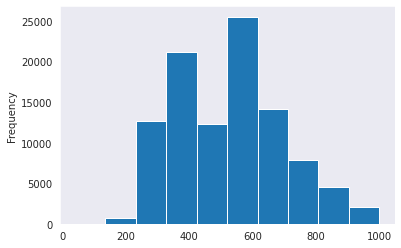

In [218]:
df_redacao_only_presece_scored['NU_NOTA_REDACAO'].plot( kind='hist')
plt.show()

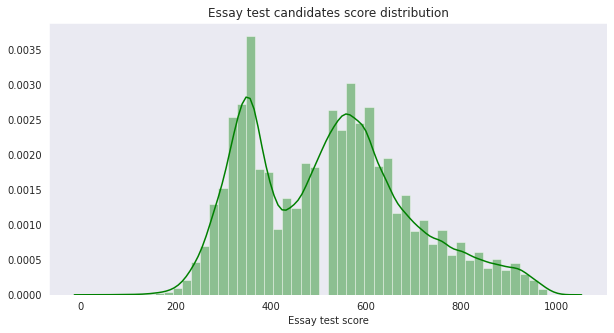

In [219]:
plt.figure(figsize=(10,5))
sns.distplot(df_redacao_only_presece_scored['NU_NOTA_REDACAO'], color='g' )
plt.title("Essay test candidates score distribution")
plt.xlabel("Essay test score")

plt.show()

In [0]:
#x = df_redacao_only_presece_scored[(df_redacao_only_presece_scored['NU_NOTA_REDACAO'] > 400) & (df_redacao_only_presece_scored['NU_NOTA_REDACAO'] < 600)]
#sns.distplot(x['NU_NOTA_REDACAO'])
##x.sort_values('NU_NOTA_REDACAO')

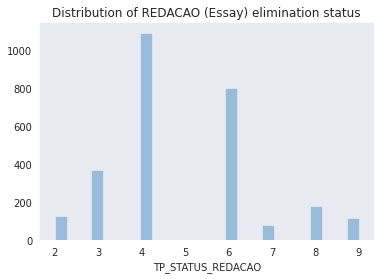

In [221]:
#Distribution of REDACAO (Essay) eliminated status
#The mojority of the candidates are aliminated for 4.Em Branco and 6.Fuga ao tema 

distribution_of_redacao_eliminated_status = df_redacao_only_presece.query('TP_STATUS_REDACAO > 1')

sns.set_style("dark")
sns.distplot(distribution_of_redacao_eliminated_status['TP_STATUS_REDACAO'] , kde=False )

plt.title("Distribution of REDACAO (Essay) elimination status")
plt.show()


In conclusion:


* The bigger majority of the candidates are eliminated in the REDACAO(Essay) by the 4.Blank(1093 candidates) and 6.Escape the theme (802 candidates); With a tendency to the 4.Blank;



*   The candidate can be evaluated by 4.Blank (1093):

  * Because the candidates did not manage the test time correctly, not having enough time to write the essay;
  
  * Or being at the semi-illiterate level, where he only has the ability to read and read, but he does not have the ability to write.


*   The candidate can be evaluated by 6.Escape the theme (802):
For this section is necessary to have in mind the on the test is propose a theme that the candidate **HAVE TO** follow in their essay test.

  * The candidates didn't understand the theme propose on the test. 

  * The candidates during the writing of the essay moved away from the main theme, characterizing an escape from the central theme proposed for the test.
  ***
  ***

**As a final conclusion the REDACAO(Essay) should be prioritized by the candidates due to their eliminatory characteristics, and also their high influence under the final candidate score**



# 2. Linear Regressio and correlation among the scores
***
On this secction we will use the df_redacao_only_presence to compare with the scores (103,774.00 scores to REDACAO (Essay))

 * Discovery the scores for each test;

 * Doing the correlation and the linear regression from among the test scores using the TP_PRESENCA_LC == REDACAO, to filter presence on REDACAO test;

 * Candidates must be present and make a minimum score '> 0' in REDACAO to avoid being eliminated;

 * If candidates are not present on the days of REDACAO TEST(Essay test) , they will be eliminated automatically.



In [222]:
# Table with candidate scores for all tests in the knowledge areas with the addition of a column 'TP_PRESENCA_LC' 
# to be used to filter absent candidates to the REDACAO test day (Eliminatory test).

df3_score = df[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'TP_PRESENCA_LC']]
df3_score


,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TP_PRESENCA_LC
0,nan,nan,nan,nan,nan,0.00
1,523.10,671.30,661.60,738.00,680.00,1.00
2,409.20,531.70,389.00,438.10,600.00,1.00
3,452.30,505.50,448.50,544.90,400.00,1.00
4,nan,nan,nan,nan,nan,0.00
...,...,...,...,...,...,...
137839,nan,nan,nan,nan,nan,0.00
137840,382.40,534.20,468.10,576.40,380.00,1.00
137841,nan,nan,nan,nan,nan,0.00
137842,452.70,509.30,527.70,591.40,300.00,1.00


In the next cell, we will select only the candidates that are present on the REDACAO day test, due to their eliminatory characteristic.

Note that for the test applied on a different day of REDACAO test, we have a smaller number of candidates tests.
 * This can be caused by the candidate's problems accessing the 2nd test or by candidates who already know that they will be eliminated by the REDACAO test done on the 1st day and will give up the exam.   


In [223]:
df4_score = df3_score.query('TP_PRESENCA_LC == 1')
df4_score.describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TP_PRESENCA_LC
count,"97,270.00","103,774.00","103,774.00","97,270.00","103,774.00","103,774.00"
mean,493.69,568.31,526.59,535.23,509.13,1.00
std,74.13,81.03,73.02,102.74,187.01,0.00
min,0.00,0.00,0.00,0.00,0.00,1.00
25%,435.50,510.40,475.70,455.70,360.00,1.00
50%,483.60,582.40,531.20,516.60,520.00,1.00
75%,542.60,628.00,579.80,600.10,620.00,1.00
max,869.60,850.40,781.40,989.90,"1,000.00",1.00


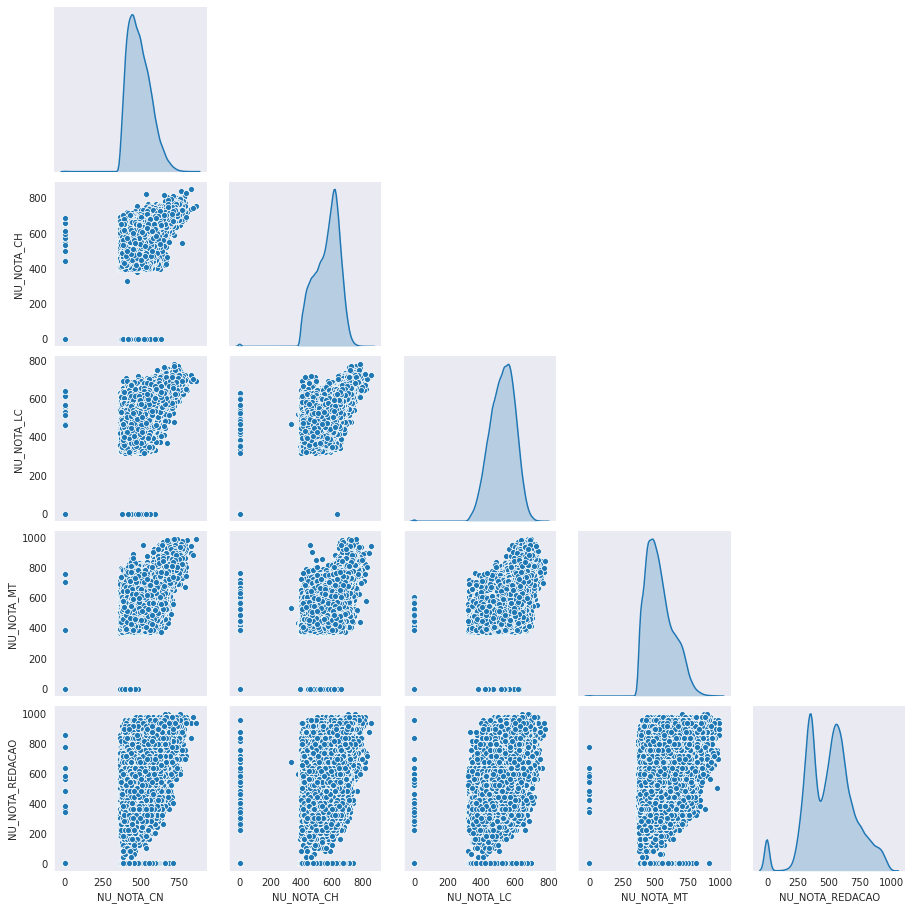

In [224]:
#Data frame showing the correlation among the test's score

sns.pairplot(data=df4_score[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']],
            corner=True, 
             diag_kind = 'kde')


**The Nan values are filtered by the ('TP_PRESENCA_LC == 1'), which will keep only the values candidates.**

Now that there are no missing values, we can calculate the correlation values ​​to see how resources are related to the result. The correlation does not, of course, imply causality, but as we are building a linear model, the correlated resources are probably useful for learning a mapping between the test grade information and whether or not they have a relationship between the different tests. In a problem with a larger number of resources, we could use a correlation limit to remove variables. In that case, we will probably want to keep all the variables and let the model decide which ones are relevant.

In [0]:
df4_score_corr = df4_score[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].corr()

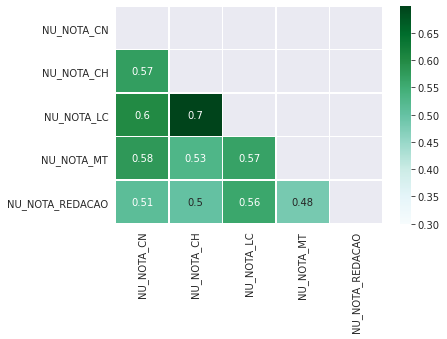

In [226]:
# Heat map showing the level of correlation among test scores.

sns.heatmap(data=df4_score_corr,
            annot=True,
            linewidths=0.5,
            vmin=0.3,
            cmap="BuGn",
            
            mask=np.triu(np.ones_like(df4_score_corr, dtype=np.bool) )
            )#mask to show only the lower phase
plt.show()

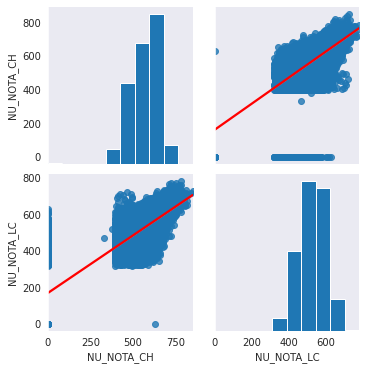

In [227]:
# The bigger correlation is 0.7, between 'NU_NOTA_CH' and 'NU_NOTA_LC'
# Plot showing the linear regression line for those scores. 

sns.pairplot(data=df4_score[['NU_NOTA_CH', 'NU_NOTA_LC']], kind='reg', plot_kws={'line_kws': {'color': 'red'}})

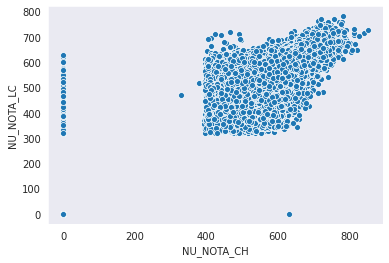

In [228]:
#Scatterplot of the between the score tests with a higher correlation score 0.7

sns.scatterplot(data=df4_score, x='NU_NOTA_CH', y='NU_NOTA_LC')
plt.show()

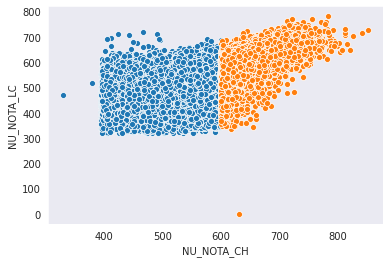

In [229]:
# High correlation score 0.7 combination. Distition by the convergent score point.
# Excluding the ZERO values from the 'NU_NOTA_CH' score 
# to visualize better the representative scores for both parameters 

#Blue
j = df4_score.query('0 < NU_NOTA_CH < 600')
sns.scatterplot(data=j,x='NU_NOTA_CH', y='NU_NOTA_LC')

#Orange
i = df4_score.query('NU_NOTA_CH > 600')
sns.scatterplot(data=i,x='NU_NOTA_CH', y='NU_NOTA_LC')
plt.show()

In [230]:
# The OUTLIER on the scateller plot axi Y ('NU_NOTA_LC'])
df4_score[(df4_score['NU_NOTA_CH'] > 600) & (df4_score['NU_NOTA_LC'] < 50)]

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TP_PRESENCA_LC
12274,nan,630.20,0.00,nan,0.00,1.00


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


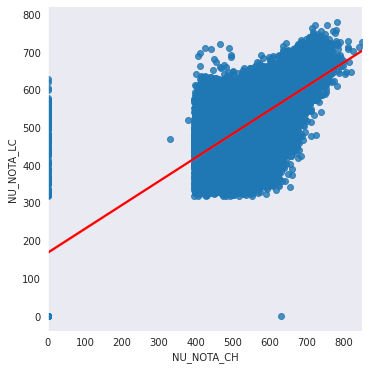

In [231]:
# High correlation score 0.7 combination, with the linear regression line
sns.pairplot(data=df4_score, x_vars='NU_NOTA_CH',y_vars='NU_NOTA_LC', 
             kind='reg', plot_kws={'line_kws': {'color':'red'}}, size=(5))
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


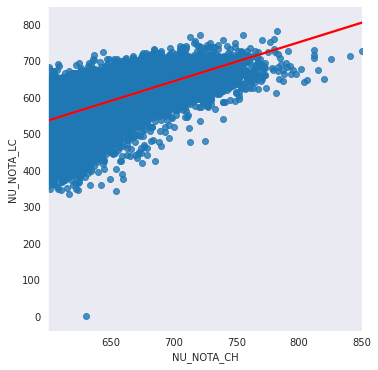

In [232]:
# High correlation score 0.7 combination, looking only the NU_NOTA_CH > 600,
# that showing a potential linear tendency. 

sns.pairplot(data=i, x_vars='NU_NOTA_CH',y_vars='NU_NOTA_LC', 
             kind='reg', plot_kws={'line_kws': {'color':'red'}}, size=(5))
plt.show()

In [233]:
#Print a Linear Regression bu Sklearn to the high correlation score 0.7 combination

from sklearn.linear_model import LinearRegression
X = i[['NU_NOTA_CH']] 
Y = i[['NU_NOTA_LC']]

regressor = LinearRegression()
regressor.fit(X,Y)

regressor.coef_
regressor.intercept_



array([-108.36518869])

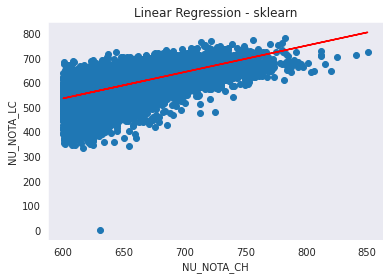

In [234]:
plt.scatter(X,Y)
plt.plot(X, regressor.predict(X), color='red')
plt.title('Linear Regression - sklearn')
plt.xlabel('NU_NOTA_CH')
plt.ylabel('NU_NOTA_LC')

plt.show()

In [235]:
# High correlation score 0.7 combination, looking only the NU_NOTA_CH & NU_NOTA_LC> 600 by Sklearn

j = df4_score[(df4_score['NU_NOTA_CH'] > 650) & (df4_score['NU_NOTA_LC'] > 600)]

Xj= j[['NU_NOTA_CH']]
Yj= j[['NU_NOTA_LC']]

regressor2 = LinearRegression()
regressor2.fit(Xj,Yj)

regressor2.coef_
regressor2.intercept_
# intercept_float or array of shape of (n_targets,),
# Independent term in the linear model. Set to 0.0 if fit_intercept = False.
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
#https://scikit-learn.org/stable/modules/linear_model.html




array([271.96449834])

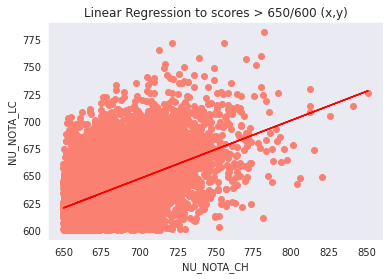

In [236]:
plt.scatter(Xj,Yj, color='salmon')
plt.plot(Xj, regressor2.predict(Xj), color='red')
plt.title('Linear Regression to scores > 650/600 (x,y)')
plt.xlabel('NU_NOTA_CH')
plt.ylabel('NU_NOTA_LC')


plt.show()

**In conclusion**

The higher correlation was founded between 'NU_ NOTA_CH' and 'NU_NOTA_LC' scores.

 * A outlier was founded in this correlarion, 	candidate 12274	NU_ NOTA_CH == 630.20	 and NU_NOTA_LC == 0.00;

 

# 3. Investigating the questions 
* Before starting this section, it is important to know that in the ENEM exam there are 4 test formats with the same question, but with a different sequence of questions. These tests are differentiated by color, so each color of tests has its respective official answer.

* This must be taken into account for a correct correlation between the candidate's answer and the official answer for his respective test.
*** 
***
Color test classification
'CO_PROVA_CN','CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT'

***Test classification by Color***

**code** ->  **color**

447->	Azul; (Blue)

448->	Amarela; (Yellow)

449	->Cinza; (Gray)

450	->Rosa; (Pink)

value_counts('CO_PROVA_CN')

447.00 ->    24452

449.00 ->   24387

448.00 ->   24333

450.00 ->  24299

467.00  ->     59

463.00    ->    7
***
***
**On this section we will compare the candidate answers with the official answers:**
 * Taking into account the Color of the test;
 * Taking into account each knowledge areas;

In [237]:
#Taking out the Nan values from the cadidates answers

df1_answers = df[['TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH','TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT']]
df1_answers_dropNan = df[['TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH','TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT']].dropna()
df1_answers_dropNan.describe()


,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT
count,97270,97270,97270,97270
unique,97226,97158,97240,97222
top,.............................................,.............................................,99999............................................,.............................................
freq,14,85,17,22


In [238]:
# Taking out the Nan values from the oficial answers
# Leaving the tables candidate and official answers with the same size.

df1_official_answers = df[['TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC', 'TX_GABARITO_MT']]
df1_official_answers_dropNan = df[['TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC', 'TX_GABARITO_MT']].dropna()
df1_official_answers_dropNan.describe()

,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT
count,97270,97270,97270,97270
unique,4,9,8,4
top,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB
freq,24384,24584,24591,24384


In [0]:
df['CO_PROVA_CN'].value_counts()
df1_color = df[['CO_PROVA_CN']]

In [0]:
# Function to compare the test answer and test official answer
# Take account the number o people score the specific question

def corrects_issues(test, subject):
  test_answer = test.get(f'TX_RESPOSTAS_{subject}')
  official_answer = test.get(f'TX_GABARITO_{subject}')

  return pd.Series([int(i==j) for i, j in zip(test_answer, official_answer)])
  
  # in this return will be formed a tuple by the zip function
  # the initial part will be compared if the elements of the tuple are the same, which represent a correct test answer

In [0]:
# All information about the answer and the color test.
# The lists will be filtered by the colors of the tests.

df1_question_data = df[['TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC', 'TX_GABARITO_MT', 
                     'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH','TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT',
                     'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT']]



In [242]:
# Analyzing the Blue test for 'CN' (Natural Sciences)

blue_test_cn = df1_question_data.query('CO_PROVA_CN == 447')

hits_matrix = blue_test_cn.apply(corrects_issues, subject='CN', axis=1)
hits_matrix




,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44
2,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
10,0,0,1,0,1,0,1,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,1,0,0,0
12,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
15,0,0,0,0,0,1,1,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0
22,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137801,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
137808,1,0,0,1,0,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,1,0,1,1,0,1,1,1,0
137821,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,0
137834,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1


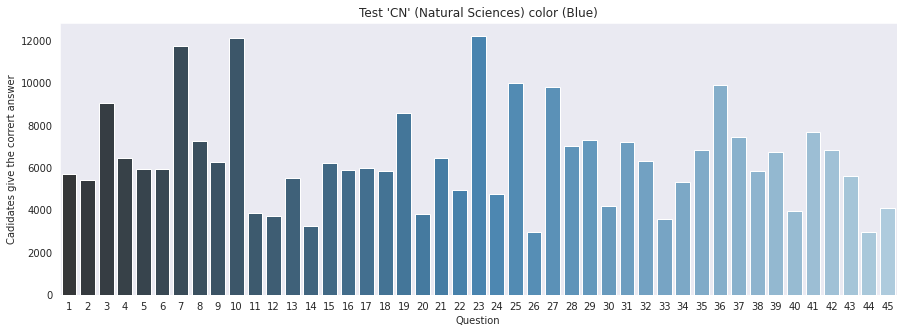

In [243]:
# In this section will be made a sum of how many candidates match correctly for the specific test question.

total_of_hits_per_question = pd.DataFrame(hits_matrix.sum())
total_of_hits_per_question.reset_index(inplace=True) 
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html
total_of_hits_per_question.columns = ['Question', 'hitScore']
total_of_hits_per_question['Question'] +=1


plt.figure(figsize=(15,5))
sns.barplot(data=total_of_hits_per_question, x='Question', y='hitScore',
            palette='Blues_d')
plt.ylabel('Cadidates give the corrert answer')
plt.title("Test 'CN' (Natural Sciences) color (Blue)")
plt.show()


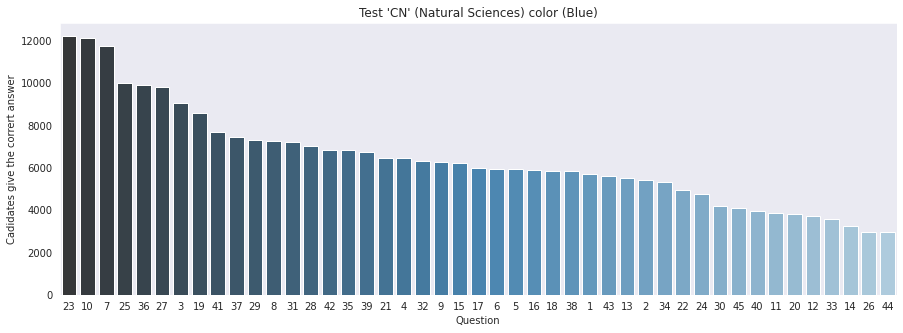

In [244]:
#Plot sorting the hitScores
plt.figure(figsize=(15,5))
sns.barplot(data=total_of_hits_per_question, x='Question', y='hitScore',
            palette='Blues_d',
            order=total_of_hits_per_question.sort_values('hitScore', ascending=False).Question)
plt.ylabel('Cadidates give the corrert answer')
plt.title("Test 'CN' (Natural Sciences) color (Blue)")
plt.show()

**In this section, we will calculate the percentage of correct answers per question, based on the data set only with the present candidates.**
---
***
---

In [254]:
len(hits_matrix)

24452

In [0]:
# In this equation we calculate the percentage of correct answers to each question. 
# We will use the len(hits_matrix) value as 100% of the answers for each question.

percentage = list(map(lambda x: (x*100)/24452, total_of_hits_per_question['hitScore']))
#list(percentage)


In [248]:
total_of_hits_per_question_percentage = total_of_hits_per_question
total_of_hits_per_question_percentage.insert(2, 'Percentage', percentage)
#total_of_hits_per_question_percentage['Percentage'] = percentage

total_of_hits_per_question_percentage.head()

,Question,hitScore,Percentage
0,1,5685,23.25
1,2,5413,22.14
2,3,9048,37.00
3,4,6457,26.41
4,5,5921,24.21


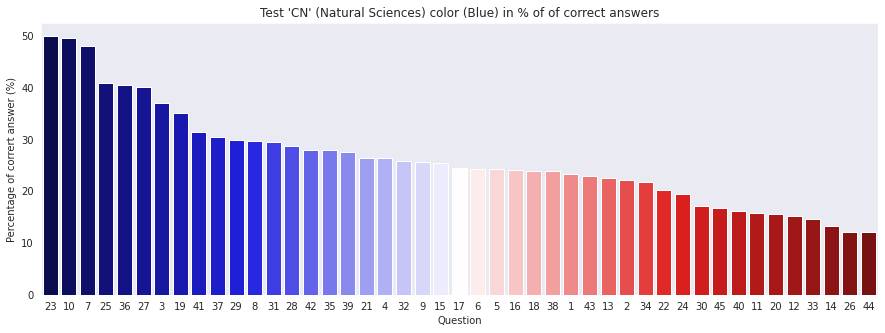

In [272]:
plt.figure(figsize=(15,5))
sns.barplot(data=total_of_hits_per_question_percentage, x='Question', y='Percentage',
            palette='seismic',
            order=total_of_hits_per_question_percentage.sort_values('hitScore', ascending=False).Question)
plt.ylabel('Percentage of corrert answer (%)')
plt.title("Test 'CN' (Natural Sciences) color (Blue) in % of of correct answers")
plt.show()

#**Conclusion**

* For the question of the test 'CN' (Natural Sciences) colored (Blue) analyzed by the bar graph, it is possible to verify the questions that have a greater and lesser number of correct answers. 

* This procedure can be applied for any color test and knowledge areas in order to analyze the questions with the highest and lowest number of correct answers.

* To this specific data set (test) there aren't question with more than 50% of concert answers;

* Unfortunately, for now, we can not compare the same question among the different color tests, because we didn't have the correlation between the question position among the test. 
  * This should be a good correlation to check if the question's position on the test influences its correction, ensuring that this parameter does not influence the grade, thus promoting the impartiality of the tests.